#Software Development for Data Science
#Module Code: MMI226822
#Coursework 1: Exploratory Data Analysis of the House Prices Dataset
              

#Introduction

The objective of this coursework is to demonstrate proficiency in advanced data analysis techniques acquired during the Software Development for Data Science course using Python. The focus lies in applying these acquired skills to conduct a comprehensive analysis of the Housing Dataset, aiming to derive meaningful insights.
This analysis involves leveraging Google Colab to create a Jupyter notebook, facilitating the exploration of the provided dataset. The process encompasses various stages such as data ingestion, cleansing, transformation, summarization, and visualization, aiming to extract valuable information from the dataset.

In [1]:
from google.colab import drive   # The code enables imports the Google Drive
drive.mount('/content/drive')    # The code mounts the Google Drive to '/content/drive' allowing you to access files and folders stored in the Google Drive within the Colab notebook.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing Libraries

In [2]:
# import libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

#The Housing Data Initial Exploration

The Housing Dataset in view is a comprehensive collection of residential property information compiled by the Assessor’s Office, spanning sales from 2006 to 2010 in a US town. Featuring over 80 descriptive variables, this dataset encapsulates a myriad of housing attributes, including zoning classifications, structural styles, land characteristics, utilities, and various quality assessments. Offering a rich array of both nominal and ordinal variables, it encompasses details on dwelling types, neighborhood locations, exterior and interior features, along with crucial sale-related information like sale prices, sale conditions, and sale types. Known for its complexity and size, this dataset serves as a treasure trove for predictive modeling, regression analysis, and understanding the dynamics influencing housing prices and market trends, crucial for optimizing investment strategies and maximizing returns in the real estate domain.


In [3]:
Housing_1 = pd.read_csv('/content/drive/MyDrive/Software_Dev/SDfDS_CW1/Housing_1.txt', sep ='\t')
Housing_2 = pd.read_csv('/content/drive/MyDrive/Software_Dev/SDfDS_CW1/Housing_2.txt', sep ='\t')


##Data Cleaning

In [4]:
Housing_1.columns.tolist()
Housing_2.columns.tolist()


['Order', 'PID', 'MS SubClass', 'SalePrice']

In [ ]:
Housing_1.describe

In [5]:
#Housing_1.head(1)
Housing_2.head(1)


,Order,PID,MS SubClass,SalePrice
0,1,526301100,20,215000


In [6]:
ColNot_Housing_1 = set(Housing_2.columns) - set(Housing_1.columns)                  ############## Put Comment
print(ColNot_Housing_1)

{'SalePrice'}


*The 'SalePrice' variable is missing in the main housing data!*
<br> The SalePrice variable is a key statistical index for the ‘housing’ data analyses and subsequent modelling *(target variable)* will be more representative of typical housing scenarios, allowing for better predictions and decisions related to investment. <br>
The *'SalePrice'* is therfore included in the housing dataset with the following codes:



In [9]:
HousingData3 = Housing_1.copy()  # Creating a copy of Housing_1
HousingData3['SalePrice'] = Housing_2['SalePrice']  # Adding 'SalePrice' column from Housing_2
HousingData3.columns.tolist()


['Order',
 'PID',
 'MS SubClass',
 'MS Zoning',
 'Lot Frontage',
 'Lot Area',
 'Street',
 'Alley',
 'Lot Shape',
 'Land Contour',
 'Utilities',
 'Lot Config',
 'Land Slope',
 'Neighborhood',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'House Style',
 'Overall Qual',
 'Overall Cond',
 'Year Built',
 'Year Remod/Add',
 'Roof Style',
 'Roof Matl',
 'Exterior 1st',
 'Exterior 2nd',
 'Mas Vnr Type',
 'Mas Vnr Area',
 'Exter Qual',
 'Exter Cond',
 'Foundation',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin SF 1',
 'BsmtFin Type 2',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 'Heating',
 'Heating QC',
 'Central Air',
 'Electrical',
 '1st Flr SF',
 '2nd Flr SF',
 'Low Qual Fin SF',
 'Gr Liv Area',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Full Bath',
 'Half Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'Kitchen Qual',
 'TotRms AbvGrd',
 'Functional',
 'Fireplaces',
 'Fireplace Qu',
 'Garage Type',
 'Garage Yr Blt',
 'Garage Finish',
 'Garage Cars',
 'Garage 

In [10]:
print('The Number of rows and columns in the Housing_1 dataset is', Housing_1.shape)
print('The Number of rows and columns in the Housing_2 dataset is', Housing_2.shape)
print('The Number of rows and columns in the HousingData3 dataset is', HousingData3.shape) # The Housing Data now contains a total of 82 descriptive variables in 2933


The Number of rows and columns in the Housing_1 dataset is (2933, 81)
The Number of rows and columns in the Housing_2 dataset is (2933, 4)
The Number of rows and columns in the HousingData3 dataset is (2933, 82)


In [11]:
HousingData3.head(2)     ############## Put Comment

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000


##Renaming the Housing Data Column Names

Renaming the Housing Data variables by removing spaces from column names
for cleaning and preparing the data for analysis is vital for various reasons:

**Consistency and readability:** Spaces in the Housing Data column names might cause inconsistencies and make it harder to reference columns consistently for a complete data analyses.

**Avoiding errors:** Removing spaces prevents potential errors that might occur due to inadvertent white spaces while referencing the Housing Data column names.

**Compatibility:** When exporting Housing Data or using it in different systems, removing spaces ensures compatibility across platforms and prevents issues arising from differences in how spaces are handled.

By removing spaces in the Housing Data column names during stage of Explorative Data Analyses, a cleaner, more consistent, and error-free data preparation is ensured, making subsequent analysis and manipulation smoother and straighter.

In [12]:
HousingData3.columns = HousingData3.columns.str.replace(' ','') ############## Put Comment

HousingData3.columns.tolist()


['Order',
 'PID',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemod/Add',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 '

# Describing the House Prices Dataset

In [13]:

print(HousingData3.info())  # Displays basic information about the dataset


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2933 entries, 0 to 2932
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order          2933 non-null   int64  
 1   PID            2933 non-null   int64  
 2   MSSubClass     2933 non-null   int64  
 3   MSZoning       2933 non-null   object 
 4   LotFrontage    2443 non-null   float64
 5   LotArea        2933 non-null   int64  
 6   Street         2933 non-null   object 
 7   Alley          198 non-null    object 
 8   LotShape       2933 non-null   object 
 9   LandContour    2933 non-null   object 
 10  Utilities      2933 non-null   object 
 11  LotConfig      2933 non-null   object 
 12  LandSlope      2933 non-null   object 
 13  Neighborhood   2933 non-null   object 
 14  Condition1     2933 non-null   object 
 15  Condition2     2933 non-null   object 
 16  BldgType       2933 non-null   object 
 17  HouseStyle     2933 non-null   object 
 18  OverallQ

Following the HousingData3.info(), the merged House Prices Dataset comprises 2933 entries and 82 columns, exhibiting a mix of numerical and categorical data types. There are several columns with missing values denoted by non-null counts lower than the total number of entries.

The Missing Values columns: LotFrontage, MasVnrType, MasVnrArea, BsmtQual, BsmtCond, BsmtExposure.

Additionally, certain columns like PoolQC, Fence, MiscFeature, and others display notably fewer non-null counts, suggesting a substantial amount of missing data in these features.

The dataset encompasses various attributes related to housing characteristics, including lot configurations, building types, year built, quality assessment, basement and garage details, porch areas, and sale-related information such as sale price, sales type, and conditions. This comprehensive dataset, while containing missing values in several columns, offers a rich set of features for housing analysis and prediction tasks.

In [16]:
print(HousingData3.describe())  # Displays basic information about the dataset

             Order           PID   MSSubClass  LotFrontage        LotArea  \
count  2933.000000  2.933000e+03  2933.000000  2443.000000    2933.000000   
mean   1464.151381  7.142811e+08    57.349131    69.237822   10147.789976   
std     846.579702  1.887213e+08    42.632965    23.354888    7876.008408   
min       1.000000  5.263011e+08    20.000000    21.000000    1300.000000   
25%     731.000000  5.284770e+08    20.000000    58.000000    7441.000000   
50%    1464.000000  5.354532e+08    50.000000    68.000000    9439.000000   
75%    2197.000000  9.071811e+08    70.000000    80.000000   11553.000000   
max    2930.000000  1.007100e+09   190.000000   313.000000  215245.000000   

       OverallQual  OverallCond    YearBuilt  YearRemod/Add   MasVnrArea  ...  \
count  2933.000000  2933.000000  2933.000000    2933.000000  2910.000000  ...   
mean      6.094102     5.562564  1971.344016    1984.241050   102.082818  ...   
std       1.410595     1.111114    30.232331      20.864849   1

The describe() function provides several statistical summaries for numerical columns in the dataset. Here are some key insights that can be drawn from the output:

Mean and Median: The mean and median SalePrice is $180,796 and $160,000 respectively, indicating a positive skewness.

Minimum and Maximum Values: The SalePrice ranges from 12,789 and 755,000 dollars shows variability in house prices.

Standard Deviation: The standard deviation for SalePrice is approximately $79,887, signifying the dispersion or spread of values around the mean.

Interquartile Range (IQR): The difference between the 75th percentile and the 25th percentile (IQR) for SalePrice is $84,000, indicating the spread of the middle 50% of data.

Skewness and Outliers:

The difference between mean and median in SalePrice suggests potential skewness or the presence of outliers.

These insights provide an initial understanding of the dataset's distribution, range, central tendency, and potential data quality issues, which would require further exploration and preprocessing for accurate analysis.

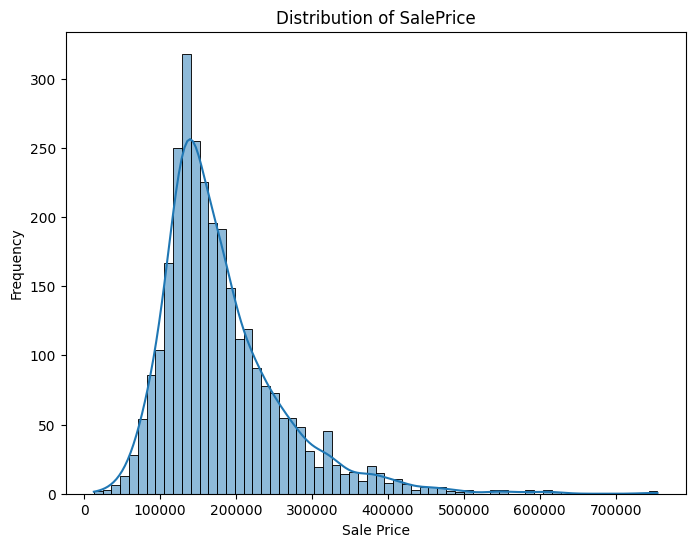

In [17]:
                       ####Histogram of SalePrice  ### Put comment for the skewness
plt.figure(figsize=(8, 6))
sns.histplot(HousingData3['SalePrice'], kde=True)
plt.title('Distribution of SalePrice')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()


##Checking for Duplicates in the House Prices Data


In [18]:
DuplicateRows = HousingData3[HousingData3.duplicated()]
NumOfDuplicates = len(DuplicateRows)
print(f"Number of duplicate rows: {NumOfDuplicates}")

Number of duplicate rows: 3


In [20]:
HousingData3 = HousingData3.drop_duplicates()

In [24]:
HousingData3.shape


(2930, 82)

##Treating the Not_Available (Na) Entries in the House Prices Data

In [23]:

MissingValsCol = HousingData3.isnull().sum() # Count NA entries per column

print("Number of NA entries per column:")   #Display the number of missing values per column
print(MissingValsCol)





Number of NA entries per column:
Order              0
PID                0
MSSubClass         0
MSZoning           0
LotFrontage      490
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 82, dtype: int64


In [26]:
# Extract columns with NA entries greater than zero
MissingCols = MissingValsCol[MissingValsCol > 0].index.tolist()

# Create a new DataFrame containing only columns with NA entries
HousingData3_NA = HousingData3[MissingCols].copy()

# Display the new DataFrame
print(HousingData3_NA)

      LotFrontage Alley MasVnrType  MasVnrArea BsmtQual BsmtCond BsmtExposure  \
0           141.0   NaN      Stone       112.0       TA       Gd           Gd   
1            80.0   NaN       None         0.0       TA       TA           No   
2            81.0   NaN    BrkFace       108.0       TA       TA           No   
3            93.0   NaN       None         0.0       TA       TA           No   
4            74.0   NaN       None         0.0       Gd       TA           No   
...           ...   ...        ...         ...      ...      ...          ...   
2928         37.0   NaN       None         0.0       TA       TA           Av   
2929          NaN   NaN       None         0.0       Gd       TA           Av   
2930         62.0   NaN       None         0.0       Gd       TA           Av   
2931         77.0   NaN       None         0.0       Gd       TA           Av   
2932         74.0   NaN    BrkFace        94.0       Gd       TA           Av   

     BsmtFinType1  BsmtFinS

In [27]:
# Calculate the count of NA values for each column
NA_CountCol = HousingData3_NA.isnull().sum()

# Create a DataFrame displaying columns and their corresponding NA counts
HousingData3_NACount = pd.DataFrame({'Column': NA_CountCol.index, 'NA Count': NA_CountCol.values})

# Display the columns and their NA counts
print(HousingData3_NACount)


          Column  NA Count
0    LotFrontage       490
1          Alley      2732
2     MasVnrType        23
3     MasVnrArea        23
4       BsmtQual        80
5       BsmtCond        80
6   BsmtExposure        83
7   BsmtFinType1        80
8     BsmtFinSF1         1
9   BsmtFinType2        81
10    BsmtFinSF2         1
11     BsmtUnfSF         1
12   TotalBsmtSF         1
13    Electrical         1
14  BsmtFullBath         2
15  BsmtHalfBath         2
16   FireplaceQu      1422
17    GarageType       157
18   GarageYrBlt       159
19  GarageFinish       159
20    GarageCars         1
21    GarageArea         1
22    GarageQual       159
23    GarageCond       159
24        PoolQC      2917
25         Fence      2358
26   MiscFeature      2824


In [ ]:
type(HousingData3_NA)
#HousingData3_NA.head()
HousingData3_NA.columns.tolist()

In [ ]:

NaWithSales = pd.merge(HousingData3_NA, Housing_2[['SalePrice']], left_index=True, right_index=True)

# Display the merged DataFrame
print(NaWithSales)


In [31]:
type(NaWithSales)
#NaWithSales.head()
NaWithSales.columns.tolist()

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Electrical',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SalePrice']

##Effect of the NA Entries on the Price of House


<ipython-input-33-f9ea7cf9d70c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = NaWithSales.corr()


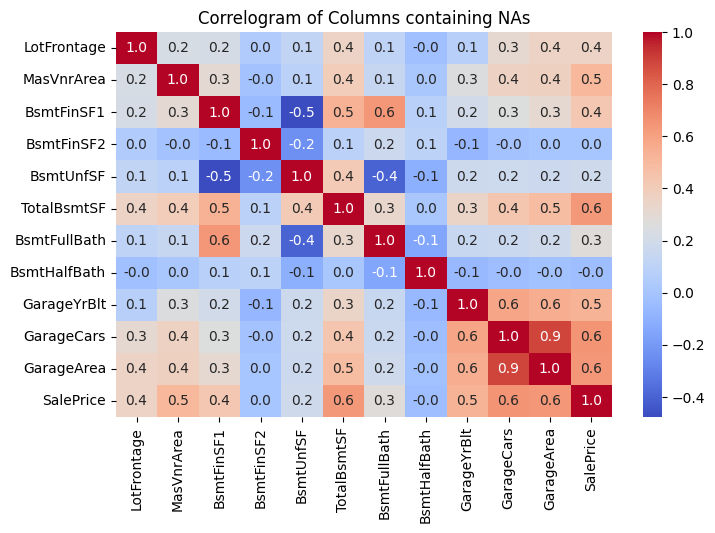

In [33]:
# Calculate the correlation matrix
correlation_matrix = NaWithSales.corr()

# Plotting the correlogram using Seaborn's heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.1f')
plt.title('Correlogram of Columns containing NAs')
plt.show()


The Correlogram shows that TotalBsmtSF and GarageCars/GarageArea columns in the Housing Dataset suggesting a relatively strong positive linear relationship with the House sales price (SalePrice).
The correlation coefficient of the TotalBsmtSF, GarageCars and GarageArea columns is 0.6 while the remaining columns in the dataset containing higher NA entries displayed weak or zero correlation values to House sales price  for individual residential properties sold in a US town, from 2006 to 2010.
          

In [35]:
#TotalBsmtSF column has 1 null entry
#GarageCars column has 1 null entry
# To the null values in TotalBsmtSF and GarageCars with zero entries

HousingData3[['TotalBsmtSF','GarageCars']] = HousingData3[['TotalBsmtSF','GarageCars']].fillna(0)

ColsNaCount = HousingData3[['TotalBsmtSF','GarageCars']].isnull().sum()
print(ColsNaCount)



TotalBsmtSF    0
GarageCars     0
dtype: int64


##Expunging the Housing Data Containing Less Effect on the Homes Price Values   

In [36]:
# List of columns to be deleted
ExpungedData_1 = ['LotFrontage','Alley','MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2',
                  'BsmtFinSF2','BsmtUnfSF','Electrical','BsmtFullBath','FireplaceQu','GarageType','GarageFinish','GarageArea','GarageQual',
                  'GarageQual','GarageCond','PoolQC','Fence','MiscFeature','BsmtHalfBath']

# Create a new DataFrame excluding the specified columns
HousingData3Ex = HousingData3.drop(columns=ExpungedData_1, axis=1)

# Display the new DataFrame
#HousingData3E.shape


In [37]:
#type(HousingData3Ex)
HousingData3Ex.shape                                 ############## put comment
#HousingData3Ex.columns.tolist()


(2930, 59)

##Removing Irregular Sales in the Housing Data

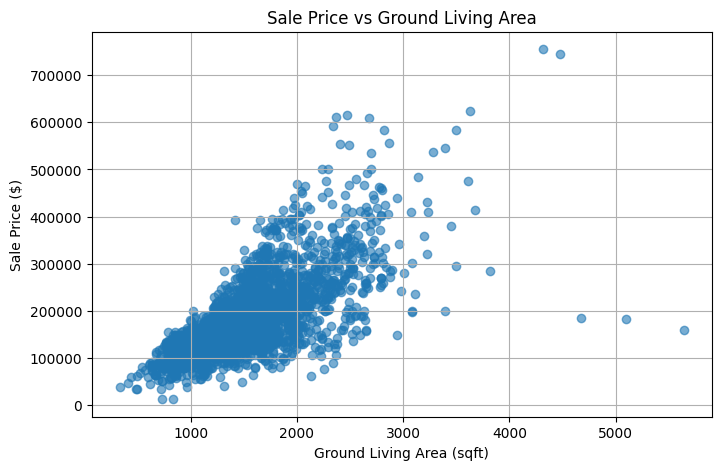

In [38]:

# Scatter plot of SalePrice vs Gr Liv Area
plt.figure(figsize=(8, 5))
plt.scatter(HousingData3Ex['GrLivArea'], HousingData3Ex['SalePrice'], alpha=0.6, label='Outliers')
plt.title('Sale Price vs Ground Living Area')
plt.xlabel('Ground Living Area (sqft)')
plt.ylabel('Sale Price ($)')
plt.grid(True)
plt.show()



The outliers in the size of house versus the Sales Price is quite noticeable on this plot as the irregularity in linear relationship started breaking at 4000 Sqft of the Ground Living Area. This observation indicates a change in the pattern of the relationship between house size and sales price, revealing feasible anomalies in the housing dataset beyond that threshold. The deviation or break from the linear pattern implies certain extreme values in the dataset, hence indicating the presence of outliers.

In [39]:
HousingData3Ex_removed = HousingData3Ex[HousingData3Ex['GrLivArea'] > 4000]

print("The number of irregular sales (Outliers) in the house data based on the Ground Living Area is", len(HousingData3Ex_removed))
print(HousingData3Ex_removed[['GrLivArea','SalePrice']].sort_values('GrLivArea'))


The number of irregular sales (Outliers) in the house data based on the Ground Living Area is 5
      GrLivArea  SalePrice
1770       4316     755000
1763       4476     745000
2184       4676     184750
2183       5095     183850
1501       5642     160000


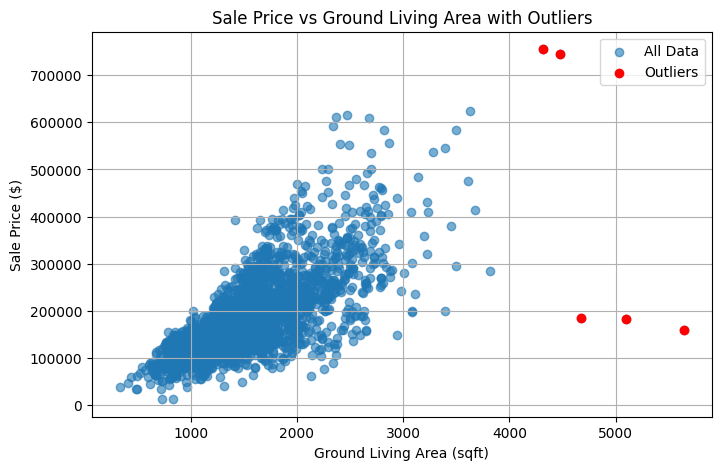

In [40]:
plt.figure(figsize=(8, 5))
plt.scatter(HousingData3Ex['GrLivArea'], HousingData3Ex['SalePrice'], alpha=0.6, label='All Data')
plt.scatter(HousingData3Ex_removed['GrLivArea'], HousingData3Ex_removed['SalePrice'], color='red', label='Outliers')
plt.title('Sale Price vs Ground Living Area with Outliers')
plt.xlabel('Ground Living Area (sqft)')
plt.ylabel('Sale Price ($)')
plt.legend()
plt.grid(True)
plt.show()


###A review of the five outliers with respect to 'GrLivArea' and 'SalePrice'

**Sale Prices:** Despite their significantly large living areas, the 'SalePrice' for these outliers doesn't show a direct linear correlation with the size of the living area. While a larger living area might generally correlate with higher sale prices, *these particular instances seem to deviate from this trend*. For example, the house with 5095 sqft 'GrLivArea' has a 'SalePrice' of 183850, which is notably lower compared to other observations with smaller living areas but higher prices like 745000.

**Potential Influence on Analysis:** These outliers would significantly influence statistical analyses and subsequent predictive models by skewing relationships between living area and sale price. Removing them would lead to a more accurate analysis helping the goal of the project.

##Removing the outliers with more than 4000 sqft Ground Living Area

In [42]:

HousingData3Ex_cleaned = HousingData3Ex[HousingData3Ex['GrLivArea'] <= 4000]          # Identifies and remove outliers with more than 4000 sqft in 'GrLivArea'

# Display the shape of the cleaned dataset to verify removal of outliers
print("Shape of cleaned dataset:", HousingData3Ex_cleaned.shape)


Shape of cleaned dataset: (2925, 59)


<ipython-input-44-c52317728251>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(HousingData3Ex_cleaned.corr(), cmap='coolwarm', annot=True, fmt=".1f")


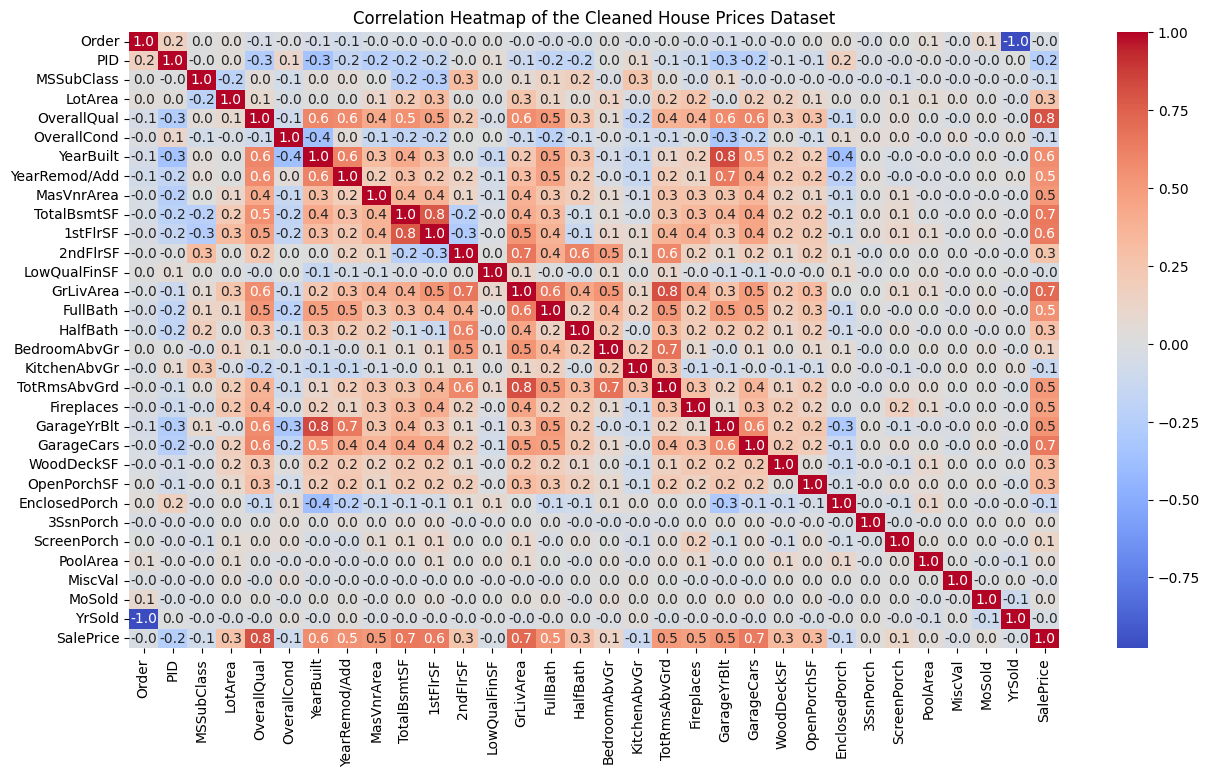

In [44]:
#Correlation heatmap of numerical features
plt.figure(figsize=(15, 8))
sns.heatmap(HousingData3Ex_cleaned.corr(), cmap='coolwarm', annot=True, fmt=".1f")
plt.title('Correlation Heatmap of the Cleaned House Prices Dataset')
plt.show()

In [45]:
HousingData3Ex_cleaned.columns.tolist()

['Order',
 'PID',
 'MSSubClass',
 'MSZoning',
 'LotArea',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemod/Add',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCondition',
 'SalePrice']